<a href="https://colab.research.google.com/github/HarlinLee/PSC/blob/main/experiments/variance_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pymanopt
!pip install geomstats
!pip install plotnine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 15.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
DRIVE_PATH = "/content/drive/MyDrive/PSC"
output_folder = "/content/drive/MyDrive/PSC/experiments/"

import sys
sys.path.insert(0, os.path.join(DRIVE_PATH, 'PSC'))


Mounted at /content/drive


In [ ]:
import plots
import projections
import utils
import comparison

INFO:root:Using numpy backend


# Comparison Visualization

In [ ]:
base_alpha = np.array([[1,0],[0,1],[0,0]])

In [ ]:
N=3
n=2
k=1
s=100
concentration=0.05
epsilon=0.5
sample=utils.sphere_point_cloud(N,n,s,epsilon, alpha=base_alpha)

In [ ]:
projected=comparison.PSC_points(sample['points'], n)

Optimizing...
Terminated - min grad norm reached after 16 iterations, 1.41 seconds.



In [ ]:
geodesic_projected = comparison.PGA_points(sample['points'].reshape(s, N), n)

In [ ]:
geodesic_projected_mean = comparison.frechetmean(geodesic_projected.reshape(s,N), N, k)

In [ ]:
projected_mean=comparison.frechetmean(projected[0].reshape(s,N), N ,k)
mean=comparison.frechetmean(sample['points'].reshape(s,N), N, k)

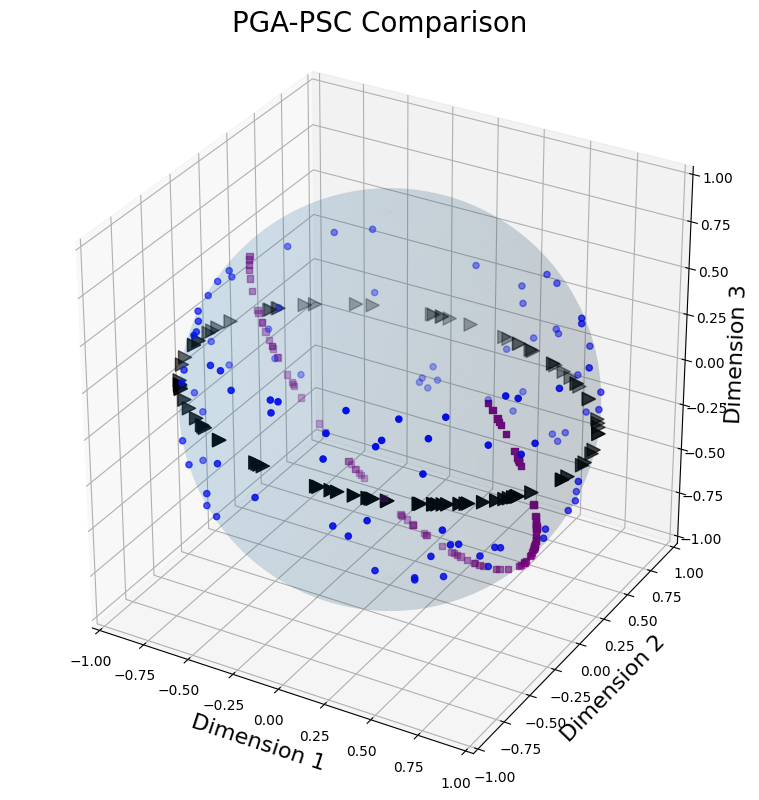

In [ ]:
X=projected[0] #in black
Y=sample['points'] #in blue
Z=geodesic_projected
title='PGA-PSC Comparison'
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
u, v = np.mgrid[0: 2 * np.pi : 100j, 0: np.pi :100j]
xx = np.cos(u) * np.sin(v)
yy = np.sin(u) * np.sin(v)
zz = np.cos(v)
ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, alpha=0.1, linewidth=0)
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c='blue', s=20) #Original points
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='black', s=90, marker=">") #Stiefel projected
ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c='purple', s=20, marker="s") #Geodesic projected
#ax.scatter(geodesic_projected_mean[0], geodesic_projected_mean[1], geodesic_projected_mean[2], c='purple', s=20)
#ax.scatter(projected_mean[0], projected_mean[1], projected_mean[2], c='red', s=20)
#ax.scatter(mean[0], mean[1], mean[2], c='green', s=90, marker=">")
ax.set_xlabel('Dimension 1', fontsize=16)
ax.set_ylabel('Dimension 2', fontsize=16)
ax.set_zlabel('Dimension 3', fontsize=16)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.set_box_aspect((1,1,1))
plt.title(title, fontsize=20)
plt.tight_layout()
plt.show()

# Explained Variance Comparison with PGA

In [ ]:
N=101
n=11
s=200
eps_vec=[0.01,0.05,0.1,0.5]
n_components=6
t=10
sample_tests = comparison.output_var_df(N, n, s, t, eps_vec, n_components)
sample_tests.to_csv(os.path.join(output_folder, "sampledf.csv"))

Optimizing...
Terminated - min grad norm reached after 73 iterations, 7.32 seconds.

Optimizing...
Terminated - min grad norm reached after 128 iterations, 12.48 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 5.76 seconds.

Optimizing...
Terminated - min grad norm reached after 72 iterations, 7.12 seconds.

Optimizing...
Terminated - min grad norm reached after 160 iterations, 15.63 seconds.

Optimizing...
Terminated - min grad norm reached after 56 iterations, 7.52 seconds.



Optimizing...


Terminated - min grad norm reached after 57 iterations, 5.26 seconds.



Optimizing...


Terminated - min grad norm reached after 246 iterations, 25.21 seconds.



Optimizing...


Terminated - min grad norm reached after 58 iterations, 5.36 seconds.



Optimizing...


Terminated - min grad norm reached after 98 iterations, 9.76 seconds.



Optimizing...
Terminated - min grad norm reached after 83 iterations, 8.19 seconds.



Optimizing...
Terminated - min grad norm reached after 101 iterations, 9.53 seconds.

Optimizing...
Terminated - min grad norm reached after 69 iterations, 7.57 seconds.

Optimizing...
Terminated - min grad norm reached after 73 iterations, 6.68 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 5.06 seconds.

Optimizing...
Terminated - min grad norm reached after 108 iterations, 8.93 seconds.

Optimizing...
Terminated - min grad norm reached after 155 iterations, 16.59 seconds.

Optimizing...
Terminated - min grad norm reached after 58 iterations, 6.43 seconds.

Optimizing...
Terminated - min grad norm reached after 48 iterations, 4.38 seconds.

Optimizing...


Terminated - min grad norm reached after 46 iterations, 5.06 seconds.

Optimizing...
Terminated - min grad norm reached after 71 iterations, 6.82 seconds.

Optimizing...
Terminated - min grad norm reached after 39 iterations, 4.13 seconds.

Optimizing...
Terminated - min grad norm reached after 86 iterations, 8.82 seconds.

Optimizing...
Terminated - min grad norm reached after 127 iterations, 11.98 seconds.

Optimizing...
Terminated - min grad norm reached after 66 iterations, 6.02 seconds.

Optimizing...
Terminated - min grad norm reached after 52 iterations, 5.91 seconds.

Optimizing...
Terminated - min grad norm reached after 79 iterations, 7.42 seconds.

Optimizing...
Terminated - min grad norm reached after 262 iterations, 25.29 seconds.

Optimizing...
Terminated - min grad norm reached after 126 iterations, 12.30 seconds.

Optimizing...
Terminated - min grad norm reached after 117 iterations, 11.13 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 4

Terminated - min grad norm reached after 96 iterations, 9.31 seconds.

Optimizing...
Terminated - min grad norm reached after 77 iterations, 7.43 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 5.95 seconds.

Optimizing...
Terminated - min grad norm reached after 43 iterations, 4.29 seconds.

Optimizing...
Terminated - min grad norm reached after 69 iterations, 6.82 seconds.

Optimizing...
Terminated - min grad norm reached after 88 iterations, 10.23 seconds.

Optimizing...
Terminated - min grad norm reached after 115 iterations, 11.36 seconds.

Optimizing...
Terminated - min grad norm reached after 38 iterations, 3.89 seconds.

Optimizing...
Terminated - min grad norm reached after 48 iterations, 4.15 seconds.

Optimizing...


Terminated - min grad norm reached after 50 iterations, 5.86 seconds.

Optimizing...


Terminated - min grad norm reached after 111 iterations, 10.43 seconds.

Optimizing...


Terminated - min grad norm reached after 195 iterations, 19.39 seconds.

Optimizing...


Terminated - min grad norm reached after 84 iterations, 7.74 seconds.

Optimizing...
Terminated - min grad norm reached after 57 iterations, 5.49 seconds.

Optimizing...


Terminated - min grad norm reached after 99 iterations, 9.76 seconds.

Optimizing...


Terminated - min grad norm reached after 56 iterations, 5.78 seconds.

Optimizing...
Terminated - min grad norm reached after 64 iterations, 5.99 seconds.

Optimizing...
Terminated - min grad norm reached after 51 iterations, 5.60 seconds.

Optimizing...
Terminated - min grad norm reached after 88 iterations, 8.04 seconds.

Optimizing...
Terminated - min grad norm reached after 135 iterations, 13.10 seconds.

Optimizing...
Terminated - min grad norm reached after 90 iterations, 9.99 seconds.

Optimizing...
Terminated - min grad norm reached after 75 iterations, 7.21 seconds.

Optimizing...
Terminated - min grad norm reached after 76 iterations, 7.51 seconds.

Optimizing...
Terminated - min grad norm reached after 46 iterations, 4.47 seconds.

Optimizing...
Terminated - min grad norm reached after 143 iterations, 13.71 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 5.44 seconds.

Optimizing...
Terminated - min grad norm reached after 205 iterations, 19.8

Terminated - min grad norm reached after 75 iterations, 7.82 seconds.

Optimizing...


Terminated - min grad norm reached after 44 iterations, 4.13 seconds.

Optimizing...


Terminated - min grad norm reached after 108 iterations, 10.70 seconds.

Optimizing...
Terminated - min grad norm reached after 61 iterations, 5.97 seconds.

Optimizing...
Terminated - min grad norm reached after 64 iterations, 6.62 seconds.

Optimizing...
Terminated - min grad norm reached after 88 iterations, 7.93 seconds.

Optimizing...


Terminated - min grad norm reached after 74 iterations, 7.76 seconds.

Optimizing...


Terminated - min grad norm reached after 90 iterations, 7.99 seconds.

Optimizing...


Terminated - min grad norm reached after 139 iterations, 13.50 seconds.

Optimizing...


Terminated - min grad norm reached after 56 iterations, 6.35 seconds.

Optimizing...


Terminated - min grad norm reached after 179 iterations, 17.57 seconds.

Optimizing...
Terminated - min grad norm reached after 70 iterations, 7.27 seconds.

Optimizing...


Terminated - min grad norm reached after 38 iterations, 3.94 seconds.

Optimizing...
Terminated - min grad norm reached after 122 iterations, 12.19 seconds.

Optimizing...
Terminated - min grad norm reached after 161 iterations, 15.40 seconds.

Optimizing...
Terminated - min grad norm reached after 39 iterations, 3.75 seconds.

Optimizing...
Terminated - min grad norm reached after 55 iterations, 4.99 seconds.

Optimizing...
Terminated - min grad norm reached after 48 iterations, 5.37 seconds.

Optimizing...
Terminated - min grad norm reached after 72 iterations, 6.07 seconds.

Optimizing...
Terminated - min grad norm reached after 59 iterations, 6.61 seconds.

Optimizing...
Terminated - min grad norm reached after 279 iterations, 28.45 seconds.

Optimizing...
Terminated - min grad norm reached after 36 iterations, 3.21 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 4.57 seconds.

Optimizing...
Terminated - min grad norm reached after 83 iterations, 8.5

Terminated - min grad norm reached after 47 iterations, 4.77 seconds.



Optimizing...
Terminated - min grad norm reached after 140 iterations, 13.38 seconds.



Optimizing...


Terminated - min grad norm reached after 42 iterations, 4.86 seconds.



Optimizing...


Terminated - min grad norm reached after 66 iterations, 6.20 seconds.



Optimizing...
Terminated - min grad norm reached after 26 iterations, 3.08 seconds.



Optimizing...


Terminated - min grad norm reached after 66 iterations, 6.28 seconds.



Optimizing...
Terminated - min grad norm reached after 555 iterations, 54.28 seconds.

Optimizing...
Terminated - min grad norm reached after 40 iterations, 3.72 seconds.

Optimizing...


Terminated - min grad norm reached after 66 iterations, 7.12 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 6.04 seconds.

Optimizing...


Terminated - min grad norm reached after 57 iterations, 5.33 seconds.

Optimizing...
Terminated - min grad norm reached after 59 iterations, 6.24 seconds.

Optimizing...
Terminated - min grad norm reached after 55 iterations, 5.10 seconds.

Optimizing...
Terminated - min grad norm reached after 57 iterations, 5.61 seconds.

Optimizing...


Terminated - min grad norm reached after 65 iterations, 7.40 seconds.

Optimizing...


Terminated - min grad norm reached after 124 iterations, 12.62 seconds.

Optimizing...


Terminated - min grad norm reached after 154 iterations, 14.99 seconds.

Optimizing...


Terminated - min grad norm reached after 59 iterations, 5.37 seconds.

Optimizing...


Terminated - min grad norm reached after 68 iterations, 7.10 seconds.

Optimizing...
Terminated - min grad norm reached after 43 iterations, 4.57 seconds.

Optimizing...
Terminated - min grad norm reached after 43 iterations, 4.33 seconds.

Optimizing...
Terminated - min grad norm reached after 59 iterations, 6.61 seconds.

Optimizing...
Terminated - min grad norm reached after 122 iterations, 11.68 seconds.

Optimizing...
Terminated - min grad norm reached after 179 iterations, 17.42 seconds.

Optimizing...
Terminated - min grad norm reached after 36 iterations, 3.36 seconds.



Optimizing...
Terminated - min grad norm reached after 46 iterations, 5.16 seconds.



Optimizing...


Terminated - min grad norm reached after 91 iterations, 8.23 seconds.



Optimizing...


Terminated - min grad norm reached after 51 iterations, 5.96 seconds.



Optimizing...


Terminated - min grad norm reached after 109 iterations, 10.21 seconds.



Optimizing...


Terminated - min grad norm reached after 84 iterations, 8.07 seconds.



Optimizing...


Terminated - min grad norm reached after 138 iterations, 13.62 seconds.

Optimizing...
Terminated - min grad norm reached after 491 iterations, 48.56 seconds.

Optimizing...


Terminated - min grad norm reached after 60 iterations, 6.39 seconds.

Optimizing...


Terminated - min grad norm reached after 69 iterations, 6.76 seconds.

Optimizing...
Terminated - min grad norm reached after 129 iterations, 12.64 seconds.

Optimizing...
Terminated - min grad norm reached after 103 iterations, 10.36 seconds.

Optimizing...


Terminated - min grad norm reached after 92 iterations, 9.46 seconds.

Optimizing...
Terminated - min grad norm reached after 55 iterations, 5.20 seconds.

Optimizing...


Terminated - min grad norm reached after 45 iterations, 3.95 seconds.

Optimizing...
Terminated - min grad norm reached after 68 iterations, 7.59 seconds.

Optimizing...
Terminated - min grad norm reached after 56 iterations, 5.14 seconds.

Optimizing...
Terminated - min grad norm reached after 123 iterations, 12.05 seconds.

Optimizing...
Terminated - min grad norm reached after 82 iterations, 8.61 seconds.

Optimizing...
Terminated - min grad norm reached after 73 iterations, 6.78 seconds.

Optimizing...


Terminated - min grad norm reached after 70 iterations, 7.41 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 4.88 seconds.

Optimizing...
Terminated - min grad norm reached after 75 iterations, 8.12 seconds.

Optimizing...
Terminated - min grad norm reached after 140 iterations, 13.14 seconds.

Optimizing...
Terminated - min grad norm reached after 46 iterations, 5.25 seconds.

Optimizing...
Terminated - min grad norm reached after 50 iterations, 4.53 seconds.

Optimizing...


Terminated - min grad norm reached after 47 iterations, 5.77 seconds.

Optimizing...


Terminated - min grad norm reached after 80 iterations, 7.50 seconds.

Optimizing...


Terminated - min grad norm reached after 95 iterations, 11.74 seconds.

Optimizing...


Terminated - min grad norm reached after 69 iterations, 5.90 seconds.

Optimizing...


Terminated - min grad norm reached after 50 iterations, 5.87 seconds.

Optimizing...
Terminated - min grad norm reached after 70 iterations, 6.15 seconds.

Optimizing...


Terminated - min grad norm reached after 61 iterations, 6.87 seconds.

Optimizing...


Terminated - min grad norm reached after 60 iterations, 5.17 seconds.

Optimizing...


Terminated - min grad norm reached after 52 iterations, 4.52 seconds.

Optimizing...


Terminated - min grad norm reached after 93 iterations, 9.24 seconds.

Optimizing...
Terminated - min grad norm reached after 125 iterations, 12.98 seconds.

Optimizing...
Terminated - min grad norm reached after 112 iterations, 9.86 seconds.

Optimizing...


Terminated - min grad norm reached after 50 iterations, 3.78 seconds.

Optimizing...


Terminated - min grad norm reached after 81 iterations, 7.71 seconds.

Optimizing...
Terminated - min grad norm reached after 149 iterations, 13.13 seconds.

Optimizing...
Terminated - min grad norm reached after 135 iterations, 10.65 seconds.

Optimizing...
Terminated - min grad norm reached after 71 iterations, 6.55 seconds.

Optimizing...
Terminated - min grad norm reached after 69 iterations, 5.74 seconds.

Optimizing...
Terminated - min grad norm reached after 147 iterations, 13.03 seconds.

Optimizing...


Terminated - min grad norm reached after 68 iterations, 6.22 seconds.

Optimizing...


Terminated - min grad norm reached after 72 iterations, 5.89 seconds.

Optimizing...
Terminated - min grad norm reached after 82 iterations, 7.39 seconds.

Optimizing...
Terminated - min grad norm reached after 57 iterations, 4.70 seconds.

Optimizing...
Terminated - min grad norm reached after 52 iterations, 5.35 seconds.

Optimizing...
Terminated - min grad norm reached after 52 iterations, 4.38 seconds.

Optimizing...
Terminated - min grad norm reached after 53 iterations, 4.52 seconds.

Optimizing...
Terminated - min grad norm reached after 232 iterations, 21.59 seconds.

Optimizing...
Terminated - min grad norm reached after 52 iterations, 4.27 seconds.

Optimizing...
Terminated - min grad norm reached after 63 iterations, 6.14 seconds.

Optimizing...
Terminated - min grad norm reached after 58 iterations, 4.79 seconds.

Optimizing...


Terminated - min grad norm reached after 50 iterations, 4.11 seconds.

Optimizing...


Terminated - min grad norm reached after 64 iterations, 6.24 seconds.

Optimizing...


Terminated - min grad norm reached after 76 iterations, 6.25 seconds.

Optimizing...
Terminated - min grad norm reached after 81 iterations, 7.58 seconds.

Optimizing...
Terminated - min grad norm reached after 47 iterations, 4.06 seconds.

Optimizing...
Terminated - min grad norm reached after 766 iterations, 64.22 seconds.

Optimizing...
Terminated - min grad norm reached after 76 iterations, 6.75 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 4.56 seconds.

Optimizing...
Terminated - min grad norm reached after 66 iterations, 5.65 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 5.61 seconds.

Optimizing...
Terminated - min grad norm reached after 60 iterations, 4.81 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 3.55 seconds.

Optimizing...


Terminated - min grad norm reached after 76 iterations, 6.92 seconds.

Optimizing...


Terminated - min grad norm reached after 84 iterations, 7.41 seconds.

Optimizing...


Terminated - min grad norm reached after 198 iterations, 16.80 seconds.

Optimizing...


Terminated - min grad norm reached after 80 iterations, 6.49 seconds.

Optimizing...


Terminated - min grad norm reached after 63 iterations, 7.44 seconds.

Optimizing...
Terminated - min grad norm reached after 104 iterations, 9.17 seconds.

Optimizing...
Terminated - min grad norm reached after 69 iterations, 5.59 seconds.

Optimizing...
Terminated - min grad norm reached after 52 iterations, 4.44 seconds.

Optimizing...
Terminated - min grad norm reached after 55 iterations, 5.44 seconds.

Optimizing...
Terminated - min grad norm reached after 43 iterations, 3.41 seconds.

Optimizing...
Terminated - min grad norm reached after 88 iterations, 8.26 seconds.

Optimizing...
Terminated - min grad norm reached after 139 iterations, 11.93 seconds.

Optimizing...


Terminated - min grad norm reached after 76 iterations, 6.20 seconds.

Optimizing...
Terminated - min grad norm reached after 525 iterations, 46.45 seconds.

Optimizing...


Terminated - min grad norm reached after 76 iterations, 6.04 seconds.

Optimizing...
Terminated - min grad norm reached after 220 iterations, 18.68 seconds.

Optimizing...
Terminated - min grad norm reached after 49 iterations, 4.82 seconds.

Optimizing...
Terminated - min grad norm reached after 41 iterations, 3.20 seconds.

Optimizing...
Terminated - min grad norm reached after 87 iterations, 8.08 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 4.37 seconds.

Optimizing...
Terminated - min grad norm reached after 71 iterations, 6.71 seconds.

Optimizing...


Terminated - min grad norm reached after 55 iterations, 4.69 seconds.

Optimizing...


Terminated - min grad norm reached after 64 iterations, 5.01 seconds.

Optimizing...
Terminated - min grad norm reached after 54 iterations, 5.64 seconds.

Optimizing...


Terminated - min grad norm reached after 77 iterations, 6.00 seconds.

Optimizing...


Terminated - min grad norm reached after 107 iterations, 9.64 seconds.

Optimizing...
Terminated - min grad norm reached after 80 iterations, 8.37 seconds.

Optimizing...
Terminated - min grad norm reached after 73 iterations, 5.97 seconds.

Optimizing...
Terminated - min grad norm reached after 55 iterations, 4.85 seconds.

Optimizing...
Terminated - min grad norm reached after 63 iterations, 5.35 seconds.

Optimizing...


Terminated - min grad norm reached after 233 iterations, 20.15 seconds.

Optimizing...


Terminated - min grad norm reached after 49 iterations, 4.49 seconds.

Optimizing...


Terminated - min grad norm reached after 51 iterations, 4.28 seconds.

Optimizing...
Terminated - min grad norm reached after 146 iterations, 12.65 seconds.

Optimizing...
Terminated - min grad norm reached after 125 iterations, 11.43 seconds.

Optimizing...
Terminated - min grad norm reached after 85 iterations, 7.77 seconds.

Optimizing...


Terminated - min grad norm reached after 95 iterations, 7.75 seconds.

Optimizing...


Terminated - min grad norm reached after 77 iterations, 7.52 seconds.

Optimizing...
Terminated - min grad norm reached after 136 iterations, 12.04 seconds.

Optimizing...
Terminated - min grad norm reached after 90 iterations, 6.80 seconds.

Optimizing...
Terminated - min grad norm reached after 75 iterations, 7.31 seconds.

Optimizing...
Terminated - min grad norm reached after 84 iterations, 6.33 seconds.

Optimizing...
Terminated - min grad norm reached after 239 iterations, 21.61 seconds.

Optimizing...


Terminated - min grad norm reached after 39 iterations, 3.21 seconds.

Optimizing...
Terminated - min grad norm reached after 103 iterations, 9.54 seconds.

Optimizing...


Terminated - min grad norm reached after 92 iterations, 7.52 seconds.

Optimizing...


Terminated - min grad norm reached after 64 iterations, 6.07 seconds.

Optimizing...
Terminated - min grad norm reached after 102 iterations, 9.88 seconds.

Optimizing...


Terminated - min grad norm reached after 67 iterations, 6.14 seconds.

Optimizing...


Terminated - min grad norm reached after 117 iterations, 10.52 seconds.

Optimizing...


Terminated - min grad norm reached after 225 iterations, 19.53 seconds.

Optimizing...
Terminated - min grad norm reached after 89 iterations, 8.17 seconds.

Optimizing...
Terminated - min grad norm reached after 121 iterations, 10.45 seconds.



In [ ]:
from plotnine import ggplot, aes, geom_line, geom_point, labs, geom_smooth, facet_grid, facet_wrap, xlab, ylab

In [ ]:
scores_tall = sample_tests.melt(id_vars=['dims','epsilon'], value_vars=['PSC','PGA'])

In [ ]:
scores_tall

,dims,epsilon,variable,value
0,2,0.01,PSC,0.961207
1,3,0.01,PSC,0.986199
2,4,0.01,PSC,0.989415
3,5,0.01,PSC,0.975246
4,6,0.01,PSC,0.978592
5,7,0.01,PSC,0.982083
6,2,0.05,PSC,0.984392
7,3,0.05,PSC,0.995311
8,4,0.05,PSC,0.996698
9,5,0.05,PSC,0.998091


INFO:matplotlib.font_manager:Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


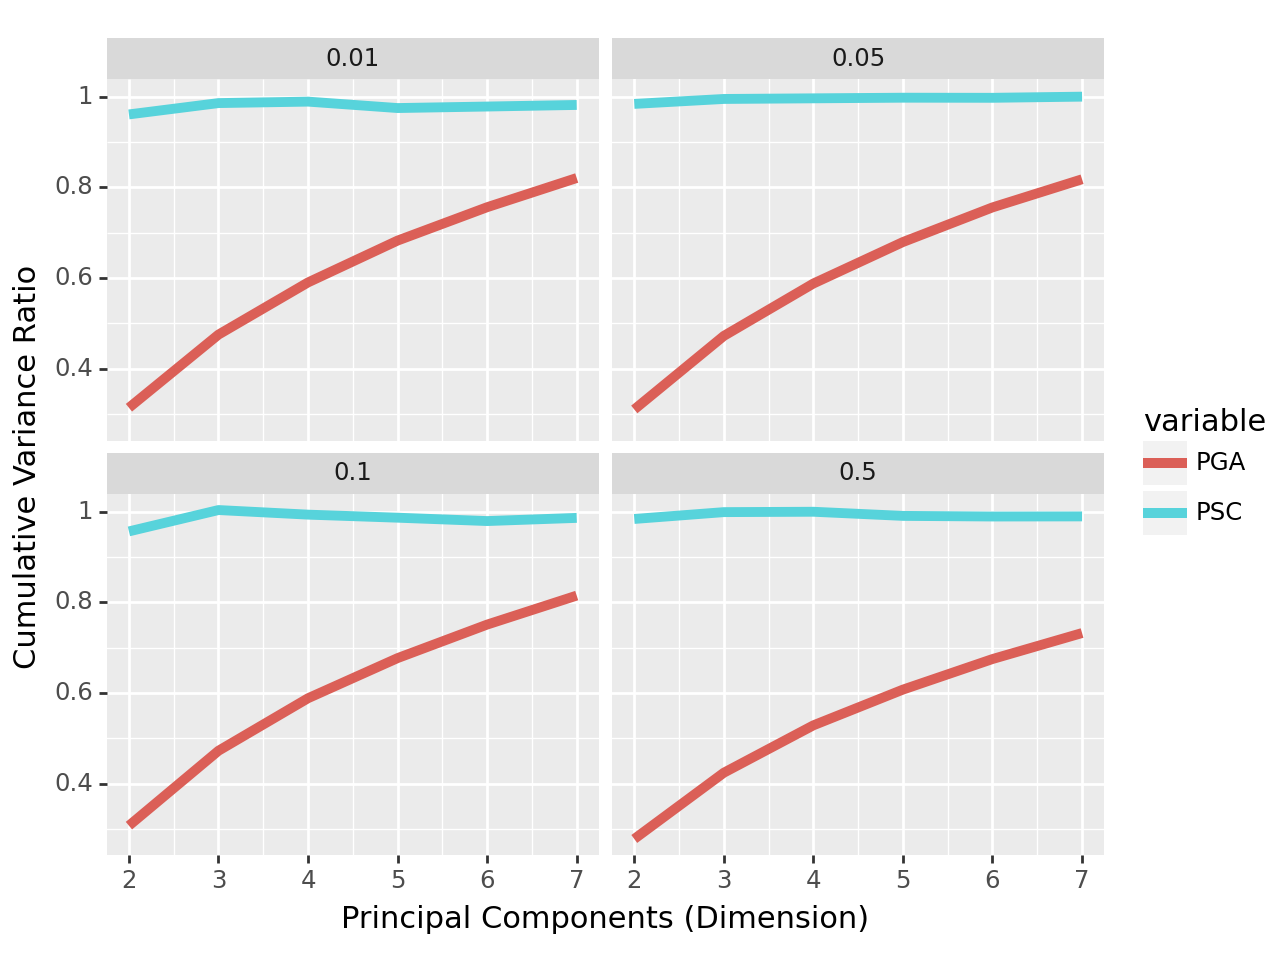

<Figure Size: (640 x 480)>

In [ ]:
(
    ggplot(scores_tall, aes('dims', 'value', color='variable')) + geom_line(size=2)+ facet_wrap('~epsilon')+xlab("Principal Components (Dimension)")+ylab("Cumulative Variance Ratio")
)